In [1]:
import sys
import snsim
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import pandas as pd 

## Config Generator Class

In [2]:
randseed = 1234 #random seed for generation
n_obj = 10000 #number of SN to generate
z_range = [0.02, 0.1] #redshift range to extract SN redshift

#time range of SNIa observation to extract t0 for each object
time_range = ["2021-08-03", "2022-08-03"]
time_range=[Time(time_range[0]).mjd, Time(time_range[1]).mjd]


snia_gen = {'M0': 'jla', #'jla' is a default value, you can just put a number
            'sigM': 0.12,# intrinsic scatter of SNIA in Hubble Diagram
            'mass_step': 2,
            'model_name': 'salt2',
            
            'alpha': 0.14,
            'beta': 2.9,
            'dist_x1': 'N21',#default value, you can use gauss distribution [mean,sig] or
                             # asymmetric gaussian [mean,sig1,sig2]
            'dist_c': [-0.055, 0.023, 0.150]#asym gaussian for generate c parameter of salt model
                            } #a
                                                                    

cosmology = {'name':'planck18'} #cosmology, in astropy format


#CMB dipole, in this case is set to 0
cmb = {'v_cmb': 0,
       'l_cmb':0,
       'b_cmb':0}

#host file config
host_conf ={
    'host_file': './test_mock_nbody.parquet',
    'key_dic': {'vpec_true': 'vpec' , 'sm':'host_mass', 'sfr':'host_sfr'}, #attention this depend on your mock file 
    'distrib': 'mass_sfr'}
#mass and sfr should not be in logaritmic scale

host = snsim.survey_host.SnHost(host_conf)
        
gen_class = getattr(snsim.generators, snsim.generators.__GEN_DIC__['snia_gen'])

# Give the input configuration
SNgenerator = gen_class(snia_gen,
                        snsim.utils.set_cosmo(cosmology),
                        time_range,
                        cmb=cmb,
                        host=host
                       )# there is also a parameter  called geometry to give the fields where extract ra, dec of SNe
                        # in this case we generate SNe full sky



# Gen basic parameters
params = SNgenerator.gen_basic_par(n_obj, randseed)


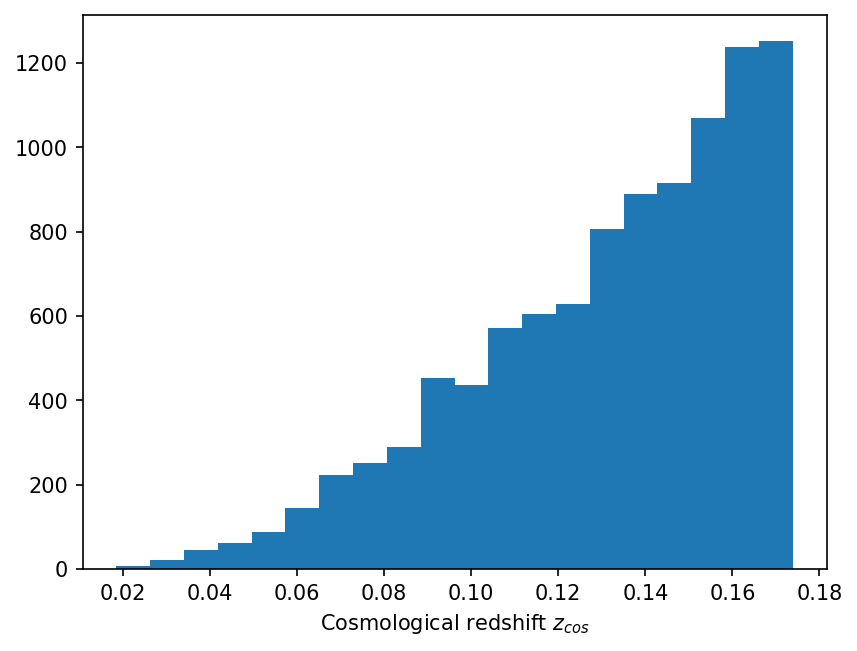

In [3]:
plt.figure(dpi=150)
plt.hist(params['zcos'], bins=20)

plt.xlabel('Cosmological redshift $z_{cos}$')
plt.show()

## Simulate SNia

In [ ]:
SNs = SNgenerator(n_obj, randseed, basic_par=params)

In [ ]:
SNs[0]._sim_par

## PLOTS

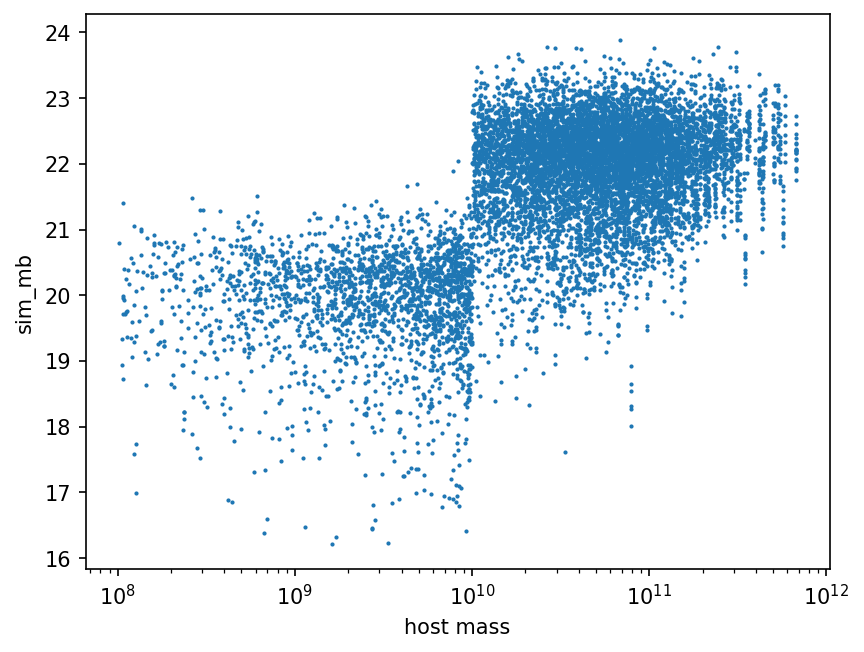

In [19]:
plt.figure(dpi=150)
plt.scatter([SN._sim_par['host_mass'] for SN in SNs], [SN.mb for SN in SNs], s=1)
plt.xlabel('host mass')
plt.ylabel('sim_mb')
plt.xscale('log')
plt.show()

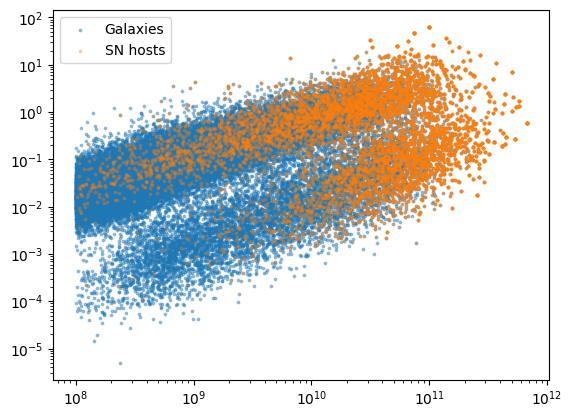

In [11]:
df = pd.read_parquet('./test_mock_nbody.parquet')
plt.figure()
plt.scatter(df.sm,df.sfr,s=3,alpha=0.4,label='Galaxies')
plt.scatter([SN._sim_par['host_mass'] for SN in SNs],[SN._sim_par['host_sfr'] for SN in SNs],s=3,alpha=0.3,label='SN hosts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Host Mass')
plt.ylabel('Host SFR')

## MATCH HOST Galaxy - SNCC 


In [3]:
sncc_gen = {'M0': -19,
            'sigM': [1.5,1.5],
            'rate': 'ztf20',
            'model_name': 'vin19_nocorr'
            }

gen_class = getattr(snsim.generators, snsim.generators.__GEN_DIC__['sniipl_gen'])

# Give the input configuration
SNgenerator = gen_class(sncc_gen,
                        snsim.utils.set_cosmo(cosmology),
                        time_range,
                        cmb=cmb,
                        host=host
                       )# there is also a parameter  called geometry to give the fields where extract ra, dec of SNe
                        # in this case we generate SNe full sky



# Gen basic parameters
params = SNgenerator.gen_basic_par(n_obj, randseed)


In [4]:
SNs = SNgenerator(n_obj, randseed, basic_par=params)

Text(0, 0.5, 'Host SFR')

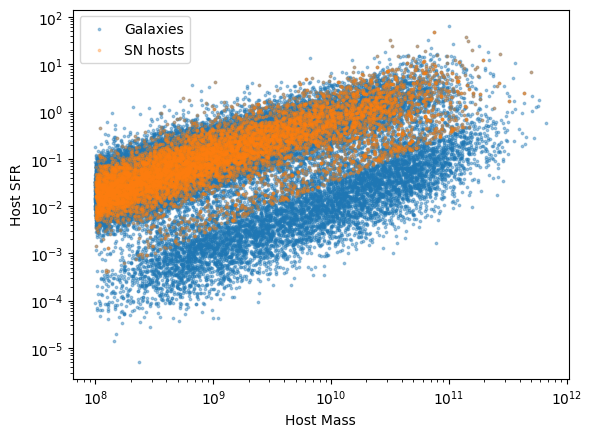

In [6]:
df = pd.read_parquet('./test_mock_nbody.parquet')
plt.figure()
plt.scatter(df.sm,df.sfr,s=3,alpha=0.4,label='Galaxies')
plt.scatter([SN._sim_par['host_mass'] for SN in SNs],[SN._sim_par['host_sfr'] for SN in SNs],s=3,alpha=0.3,label='SN hosts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Host Mass')
plt.ylabel('Host SFR')